In [1]:
## importing required librabry

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## loading data set 
df=pd.read_csv("../data/fraud_data.csv")
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


## Inspecting Data 

In [3]:
df.shape

(14446, 15)

In [4]:
df.info() # no of rows of every column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

In [5]:
df.isna().sum() # check for null values in each column 

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
"""
trans_date_trans_time - should be datime series
city_pop' - should be int 
is_fraud - should be bool 
"""

"\ntrans_date_trans_time - should be datime series\ncity_pop' - should be int \nis_fraud - should be bool \n"

In [8]:
df["trans_date_trans_time"]=pd.to_datetime(df["trans_date_trans_time"],format="%d-%m-%Y %H:%M")
# 

In [9]:
df["trans_date_trans_time"].isna().sum()

np.int64(0)

In [10]:
df["trans_date_trans_time"].describe()

count                            14446
mean     2019-12-16 02:14:56.664820480
min                2019-01-01 00:00:00
25%                2019-01-12 16:32:15
50%                2019-08-05 00:47:30
75%                2020-12-27 20:52:45
max                2020-12-31 23:59:00
Name: trans_date_trans_time, dtype: object

In [11]:
df["trans_date_trans_time"].value_counts()

trans_date_trans_time
2020-12-26 23:29:00    5
2019-01-21 23:09:00    5
2020-12-27 12:46:00    5
2020-12-29 08:37:00    5
2020-12-29 16:57:00    5
                      ..
2019-01-22 00:19:00    1
2019-01-22 00:18:00    1
2019-01-22 00:07:00    1
2019-01-22 00:01:00    1
2019-01-21 23:59:00    1
Name: count, Length: 12126, dtype: int64

In [12]:
#df["city_pop"]=df["city_pop"].astype("int")

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14446 non-null  datetime64[ns]
 1   merchant               14446 non-null  object        
 2   category               14446 non-null  object        
 3   amt                    14446 non-null  float64       
 4   city                   14446 non-null  object        
 5   state                  14446 non-null  object        
 6   lat                    14446 non-null  float64       
 7   long                   14446 non-null  float64       
 8   city_pop               14446 non-null  int64         
 9   job                    14446 non-null  object        
 10  dob                    14446 non-null  object        
 11  trans_num              14446 non-null  object        
 12  merch_lat              14446 non-null  float64       
 13  m

In [14]:
df["is_fraud"].value_counts()

is_fraud
0                         12600
1                          1844
1"2020-12-24 16:56:24"        1
0"2019-01-01 00:00:44"        1
Name: count, dtype: int64

In [15]:
df["is_fraud"]=pd.to_numeric(df["is_fraud"],errors="coerce")

In [16]:
df["is_fraud"].value_counts()

is_fraud
0.0    12600
1.0     1844
Name: count, dtype: int64

In [17]:
df["is_fraud"].isna().sum()

np.int64(2)

In [18]:
df["is_fraud"]=df["is_fraud"].astype("bool")

In [19]:
df["is_fraud"].value_counts()

is_fraud
False    12600
True      1846
Name: count, dtype: int64

## Filtering out and Preperation for analysis

In [20]:
df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [21]:
# creating new dataframe with only necessary column 
card_fraud=df[['trans_date_trans_time','category','city','state','amt','is_fraud']]

In [22]:
card_fraud.head()

,trans_date_trans_time,category,city,state,amt,is_fraud
0,2019-01-04 00:58:00,grocery_net,Wales,AK,14.37,True
1,2019-01-04 15:06:00,shopping_net,Wales,AK,966.11,True
2,2019-01-04 22:37:00,misc_pos,Wales,AK,49.61,True
3,2019-01-04 23:06:00,grocery_pos,Wales,AK,295.26,True
4,2019-01-04 23:59:00,health_fitness,Wales,AK,18.17,True


In [23]:
card_fraud_t=card_fraud[card_fraud["is_fraud"]==True]

In [24]:
card_fraud_t.head()

,trans_date_trans_time,category,city,state,amt,is_fraud
0,2019-01-04 00:58:00,grocery_net,Wales,AK,14.37,True
1,2019-01-04 15:06:00,shopping_net,Wales,AK,966.11,True
2,2019-01-04 22:37:00,misc_pos,Wales,AK,49.61,True
3,2019-01-04 23:06:00,grocery_pos,Wales,AK,295.26,True
4,2019-01-04 23:59:00,health_fitness,Wales,AK,18.17,True


In [25]:
card_fraud_t.shape

(1846, 6)

In [26]:
card_fraud_t_citywise=card_fraud_t.groupby("city")["is_fraud"].agg(["sum"]).sort_values(by="sum", ascending=False)
card_fraud_t_citywise

,sum
city,
Wales,30
San Jose,27
Albuquerque,24
Thompson,24
Aurora,23
...,...
Newhall,3
Odessa,3
Vancouver,3


In [27]:
card_fraud_t_state=card_fraud_t.groupby("state")["is_fraud"].agg(["sum"]).sort_values("sum",ascending=False)
card_fraud_t_state

,sum
state,
CA,411
MO,267
NE,238
OR,197
WA,126
NM,121
WY,119
CO,115
UT,73


In [28]:
card_fraud_t_cat=card_fraud_t.groupby("category")["is_fraud"].agg(["sum"]).sort_values("sum",ascending=False)
card_fraud_t_cat

,sum
category,
grocery_pos,444
shopping_net,396
misc_net,223
shopping_pos,194
gas_transport,159
misc_pos,64
entertainment,59
personal_care,57
kids_pets,56


## Visualizing the fraud 

In [29]:
# 

In [30]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [31]:
plt.style.use("dark_background")

## Fraud Visualization Citywise 

Text(0.5, 1.0, 'Top 10 States of Fraud Citywise')

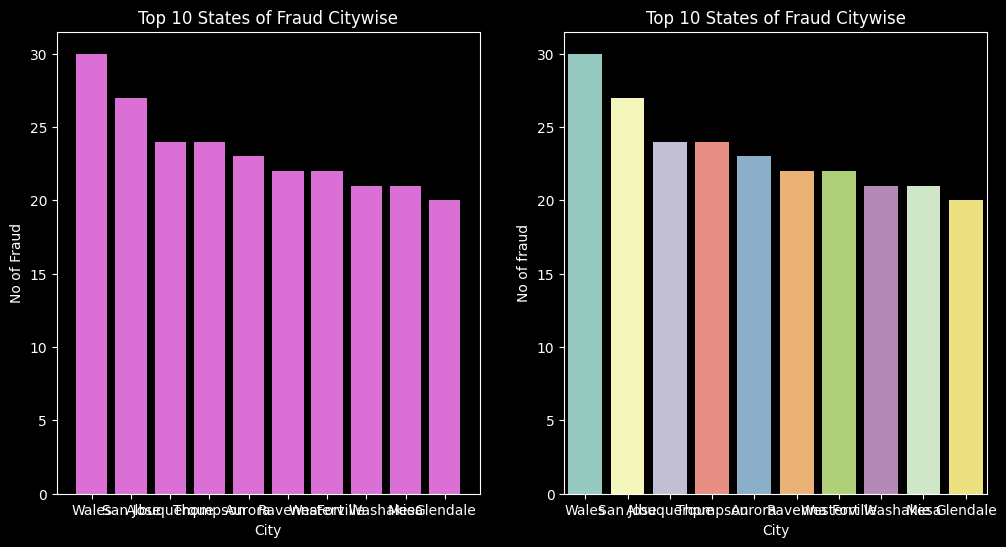

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
#card_fraud_t_citywise=card_fraud_t.groupby("city")["is_fraud"].agg(["sum"]).sort_values(by="sum", ascending=False)
card_fraud_t_citywise=card_fraud_t_citywise.head(10)
plt.bar(x=(card_fraud_t_citywise.index),height=(card_fraud_t_citywise["sum"]),color="orchid")
plt.xlabel("City")
plt.ylabel("No of Fraud")
plt.title("Top 10 States of Fraud Citywise")

plt.subplot(1,2,2)
sns.barplot(data = card_fraud_t_citywise,
            x=(card_fraud_t_citywise.index),
            y=(card_fraud_t_citywise["sum"]),
           hue=card_fraud_t_citywise.index)
plt.xlabel("City")
plt.ylabel("No of fraud")
plt.title("Top 10 States of Fraud Citywise")


## Fraud Visualization Statewise 

Text(0.5, 1.0, 'No of fraud Statewise')

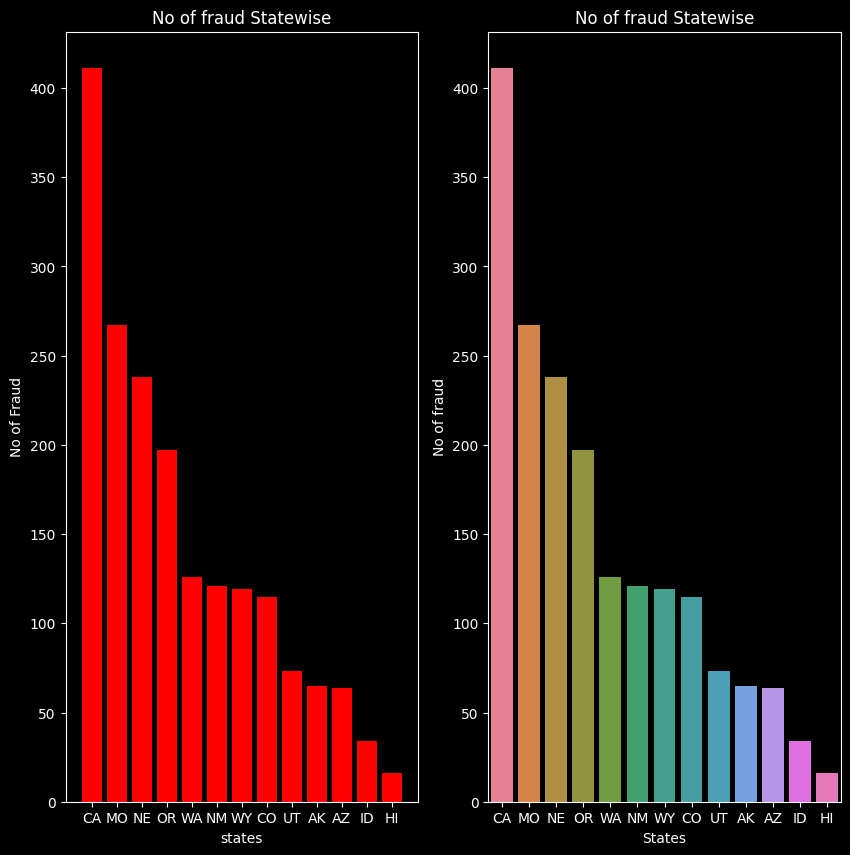

In [33]:
# card_fraud_t_state=card_fraud_t.groupby("state")["is_fraud"].agg(["sum"]).sort_values("sum",ascending=False)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.bar(x=card_fraud_t_state.index,height=card_fraud_t_state["sum"],color="red")
plt.xlabel("states")
plt.ylabel("No of Fraud")
plt.title("No of fraud Statewise")

plt.subplot(1,2,2)
sns.barplot(data=card_fraud_t_state,
           x=card_fraud_t_state.index,
           y=card_fraud_t_state["sum"],hue=card_fraud_t_state.index)
plt.xlabel("States")
plt.ylabel("No of fraud")
plt.title("No of fraud Statewise")


## Fraud Visualization Categorywise 

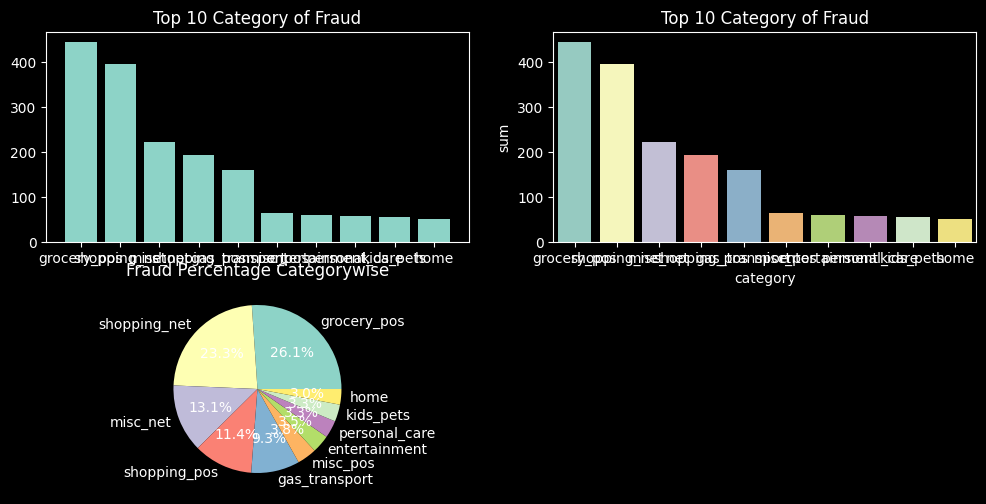

In [34]:
card_fraud_t_cat=card_fraud_t.groupby("category")["is_fraud"].agg(["sum"]).sort_values("sum",ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.bar(x=card_fraud_t_cat.index,height=card_fraud_t_cat["sum"])
plt.title("Top 10 Category of Fraud")

plt.subplot(2,2,2)
sns.barplot(data=card_fraud_t_cat,
            x=card_fraud_t_cat.index, 
            y=card_fraud_t_cat["sum"],
            hue=card_fraud_t_cat.index)
plt.title("Top 10 Category of Fraud")


plt.subplot(2,2,3)
plt.pie(card_fraud_t_cat["sum"],labels=card_fraud_t_cat.index,autopct="%1.1f%%")
plt.title("Fraud Percentage Categorywise")
plt.show()